In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from scipy.stats import mode

In [2]:
iris_data = load_iris()

In [3]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
X = iris_data.data
y = iris_data.target

In [16]:
X.shape,y.shape,iris_data.target_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [17]:
def Euclidean_distance(x1,x2):
    euc_dist = np.sqrt(np.sum((x1 - x2)**2))
    return euc_dist

In [18]:
def Predict(X,y,xval,k):
    l = []
    for i in range(len(xval)):
        list_of_distances = []
        for j in range(len(X)):
            distance = Euclidean_distance(xval[i,:],X[j,:])
            list_of_distances.append(distance)
        
        list_of_distances = np.array(list_of_distances)
        
        arg_knearest = np.argsort(list_of_distances)[:k]
        labels = y[arg_knearest]
        
        label = mode(labels)[0]
        #label= label.mode[0]
        l.append(label)
    
    return l

In [19]:
x_min , x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1

y_min , y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.2),np.arange(y_min,y_max,0.2))

In [20]:
xval = np.c_[xx.ravel(),yy.ravel()]

In [21]:
def Plot_mesh_and_data(k,xx,yy,yval_label,X,y):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.figure()
    plt.pcolormesh(xx, yy, yval_label.reshape(xx.shape), cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% (k))

    plt.show()

<ipython-input-21-533560e216b4>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, yval_label.reshape(xx.shape), cmap=cmap_light)


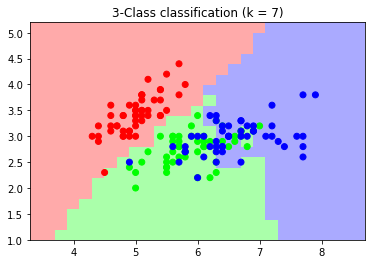

In [22]:
k = 7
yval_label = Predict(X[:,:2],y,xval,k)
yval_label = np.asarray(yval_label)
Plot_mesh_and_data(k,xx,yy,yval_label,X,y)

<ipython-input-21-533560e216b4>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, yval_label.reshape(xx.shape), cmap=cmap_light)


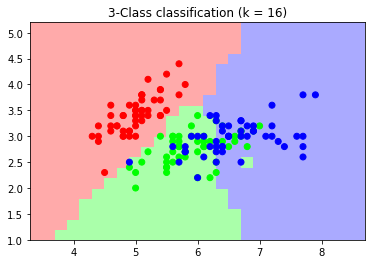

In [23]:
k=16
yval_label = Predict(X[:,:2],y,xval,k)
yval_label = np.asarray(yval_label)
Plot_mesh_and_data(k,xx,yy,yval_label,X,y)

In [24]:
# Expected value of K is sqrt(N)/2
exp_k = np.sqrt(len(X))/2
floor_k, ceil_k = np.floor(exp_k),np.ceil(exp_k)

<ipython-input-21-533560e216b4>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, yval_label.reshape(xx.shape), cmap=cmap_light)


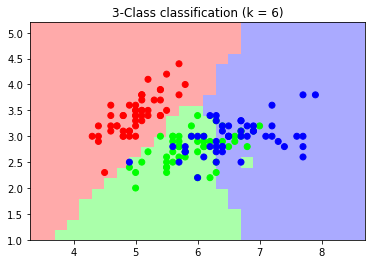

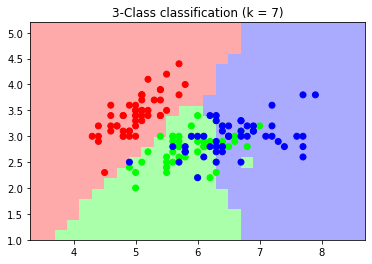

In [25]:
for each_k in [floor_k,ceil_k]:
    Plot_mesh_and_data(each_k,xx,yy,yval_label,X,y)

----------------------------------
for K= 1 



<ipython-input-12-533560e216b4>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, yval_label.reshape(xx.shape), cmap=cmap_light)


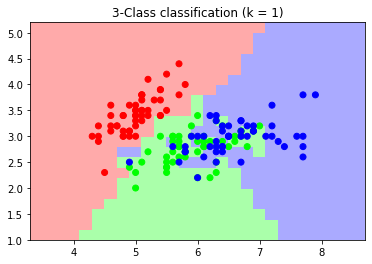

----------------------------------
for K= 2 



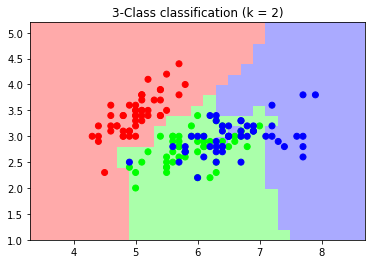

----------------------------------
for K= 3 



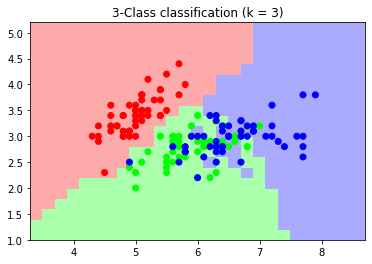

----------------------------------
for K= 4 



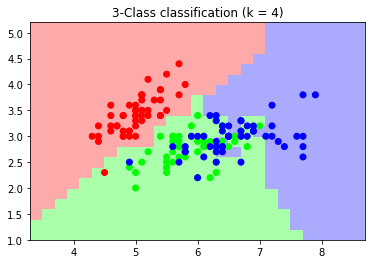

----------------------------------
for K= 5 



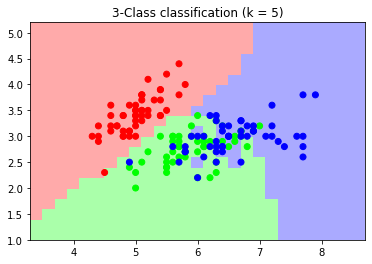

----------------------------------
for K= 6 



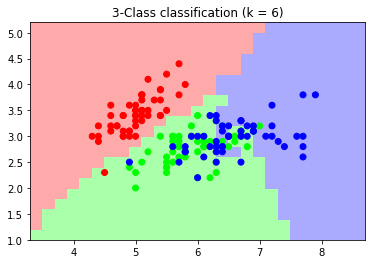

----------------------------------
for K= 7 



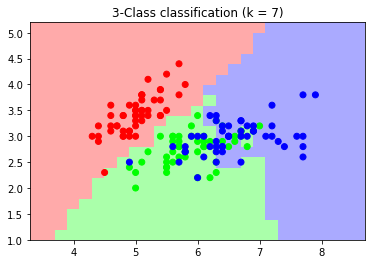

----------------------------------
for K= 8 



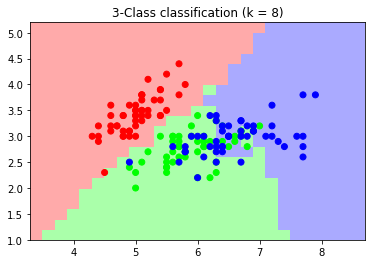

----------------------------------
for K= 9 



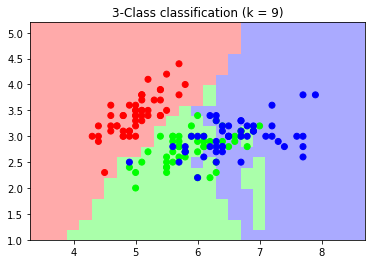

----------------------------------
for K= 10 



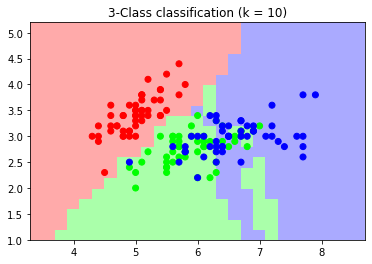

----------------------------------
for K= 11 



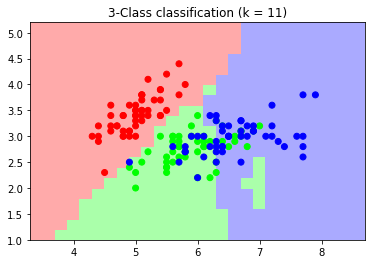

----------------------------------
for K= 12 



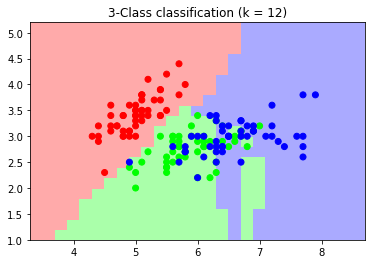

----------------------------------
for K= 13 



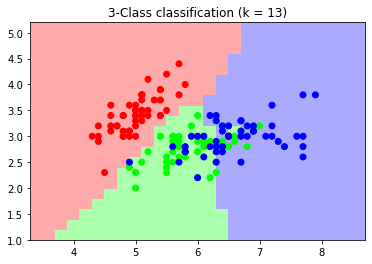

----------------------------------
for K= 14 



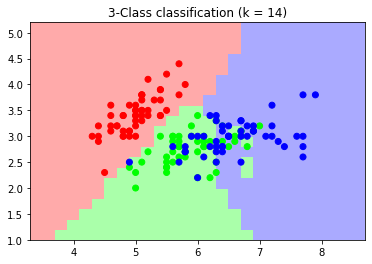

----------------------------------
for K= 15 



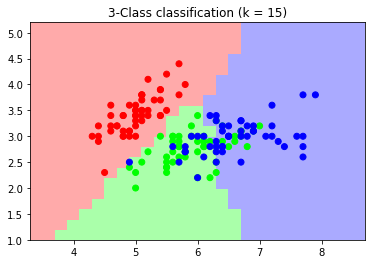

----------------------------------
for K= 16 



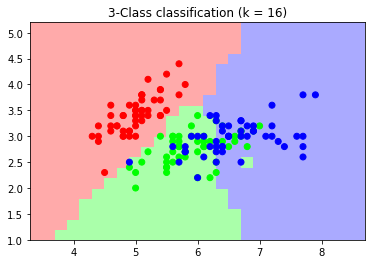

----------------------------------
for K= 17 



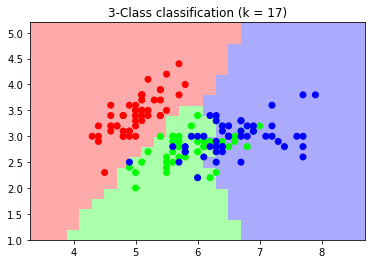

----------------------------------
for K= 18 



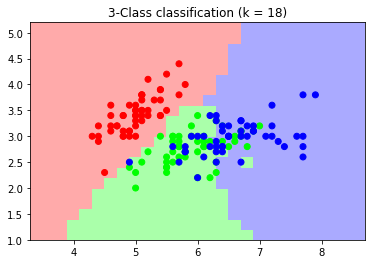

----------------------------------
for K= 19 



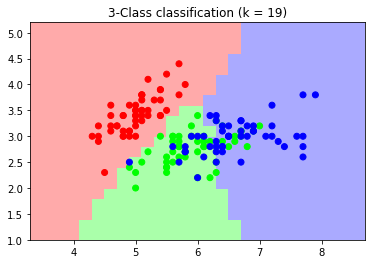

----------------------------------
for K= 20 



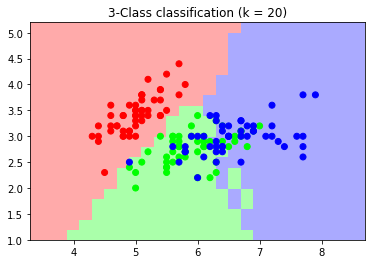

----------------------------------


In [13]:
# Go from K =  1 to K = 20 
print("----------------------------------")
for i in range(1,21,1):
    yval_label = Predict(X[:,:2],y,xval,i)
    yval_label = np.asarray(yval_label)
    print("for K=",i,"\n")
    Plot_mesh_and_data(i,xx,yy,yval_label,X,y)
    print("----------------------------------")